# 决策树

## 建立分类树

In [18]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [19]:
wine=load_wine()

In [20]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [21]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [22]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [23]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target,test_size=0.3)

In [24]:
Ytrain

array([1, 0, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 1, 1,
       2, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 1,
       1, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 2, 1, 2, 0, 1,
       1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2,
       1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1])

In [59]:
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  random_state=0, #设置一个正整数，以确定score，消除随机
                                splitter = 'random' #不纯度不是逐渐降低，树更深
                                 )
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)#返回预测的准确度

score

0.8888888888888888

In [57]:
import graphviz
dot_data = tree.export_graphviz(clf,feature_names = wine.feature_names,class_names = ['琴酒','雪莉','贝尔摩德'],
                               filled = True,
                               rounded = True
                               )
graph = graphviz.Source(dot_data)
#graph

In [43]:
clf.feature_importances_

array([0.02733989, 0.01031618, 0.        , 0.        , 0.06824585,
       0.0766398 , 0.10452878, 0.        , 0.        , 0.43200005,
       0.24509627, 0.02020211, 0.01563107])

In [44]:
#分类树对测试集的拟合程度如何
score_train = clf.score(Xtrain,Ytrain)
score_train

1.0

In [84]:
#分类树的剪枝
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  random_state = 8, #设置一个正整数，以确定score，消除随机
                                  splitter = 'random' , #不纯度随机，树更深
                                  max_depth = 6, #限制树深
                                  #min_samples_leaf = 10, 
                                  #min_samples_split = 15                                
                                 )
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)#返回预测的准确度

score

0.9629629629629629

In [56]:
import graphviz
dot_data = tree.export_graphviz(clf,feature_names = wine.feature_names,class_names = ['琴酒','雪莉','贝尔摩德'],
                               filled = True,
                               rounded = True
                               )
graph = graphviz.Source(dot_data)
#graph

In [86]:
score_train = clf.score(Xtrain,Ytrain)
score_train

1.0

<function matplotlib.pyplot.show(close=None, block=None)>

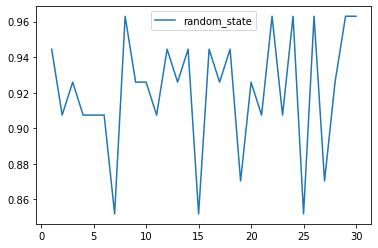

In [90]:
import matplotlib.pyplot as plt
test = []
for i in range(30):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy'
                                     ,splitter = 'random'
                                     ,random_state = i+1
                                     ,max_depth = 6
                                     )
    clf = clf.fit(Xtrain,Ytrain)
    score = clf.score(Xtest,Ytest)
    test.append(score)
plt.plot(range(1,31),test,label = 'random_state')
plt.legend()
plt.show

In [93]:
#apply返回每个测试样本所在的叶子节点
clf.apply(Xtest)
#predict返回每个测试样本的回归结果
clf.predict(Xtest)

array([1, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 2, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0,
       1, 2, 2, 1, 0, 0, 1, 2, 2, 0])

array([[1.184e+01, 8.900e-01, 2.580e+00, 1.800e+01, 9.400e+01, 2.200e+00,
        2.210e+00, 2.200e-01, 2.350e+00, 3.050e+00, 7.900e-01, 3.080e+00,
        5.200e+02],
       [1.351e+01, 1.800e+00, 2.650e+00, 1.900e+01, 1.100e+02, 2.350e+00,
        2.530e+00, 2.900e-01, 1.540e+00, 4.200e+00, 1.100e+00, 2.870e+00,
        1.095e+03],
       [1.419e+01, 1.590e+00, 2.480e+00, 1.650e+01, 1.080e+02, 3.300e+00,
        3.930e+00, 3.200e-01, 1.860e+00, 8.700e+00, 1.230e+00, 2.820e+00,
        1.680e+03],
       [1.282e+01, 3.370e+00, 2.300e+00, 1.950e+01, 8.800e+01, 1.480e+00,
        6.600e-01, 4.000e-01, 9.700e-01, 1.026e+01, 7.200e-01, 1.750e+00,
        6.850e+02],
       [1.200e+01, 1.510e+00, 2.420e+00, 2.200e+01, 8.600e+01, 1.450e+00,
        1.250e+00, 5.000e-01, 1.630e+00, 3.600e+00, 1.050e+00, 2.650e+00,
        4.500e+02],
       [1.164e+01, 2.060e+00, 2.460e+00, 2.160e+01, 8.400e+01, 1.950e+00,
        1.690e+00, 4.800e-01, 1.350e+00, 2.800e+00, 1.000e+00, 2.750e+00,
        6.80

## 回归树

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
boston = load_boston()
regressor = DecisionTreeRegressor(random_state = 0) # 实例化
cross_val_score (regressor,boston.data,boston.target,cv=10,
                 scoring = 'neg_mean_squared_error'
                )


array([-18.08941176, -10.61843137, -16.31843137, -44.97803922,
       -17.12509804, -49.71509804, -12.9986    , -88.4514    ,
       -55.7914    , -25.0816    ])

In [3]:
# 拟合正弦函数
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [4]:
# 训练集
rng = np.random.RandomState(1)
X = np.sort(5*rng.rand(80,1),axis=0)
y = np.sin(X).ravel() # 降维
y.shape

(80,)

In [5]:
 y[::5] +=3*(0.5-rng.rand(16)) #添加噪声 

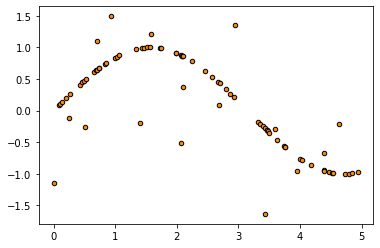

In [10]:
plt.scatter(X,y, s=20, edgecolor='black', c='darkorange', label='data')

In [30]:
regr_1 = DecisionTreeRegressor(max_depth=3)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X,y)
regr_2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [31]:
#测试集
X_test = np.arange(0.0,5.0,0.01)[: , np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

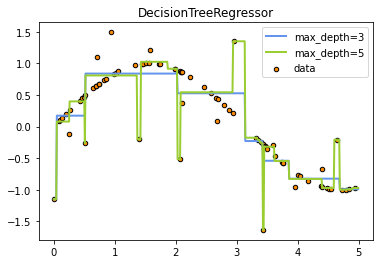

In [32]:
plt.figure()
plt.scatter(X,y, s=20, edgecolor='black', c='darkorange', label='data')
plt.plot(X_test,y_1, color='cornflowerblue', label='max_depth=3', linewidth=2)
plt.plot(X_test,y_2, color='yellowgreen', label='max_depth=5', linewidth=2)#过拟合
plt.xlabel = 'data'
plt.ylabel = 'target'
plt.title('DecisionTreeRegressor')
plt.legend()
plt.show()

## 实例 泰坦尼克幸存者的预测

In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('H:/Download/train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 筛选特征
data.drop(['Cabin','Name','Ticket','Embarked'],inplace=True,axis=1)
# 处理缺失值
data['Age']=data['Age'].fillna(data['Age'].mean())
# 转化数值
data['Sex'] = (data['Sex'] == 'male').astype(int)

In [5]:
x = data.iloc[:,data.columns != 'Survived']
y = data.iloc[:,data.columns == 'Survived']

In [6]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.3)

In [7]:
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])

In [11]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.7089552238805971

In [13]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
score = cross_val_score(clf,x,y, cv=10).mean()
score

0.7419101123595506

0.8148189762796504


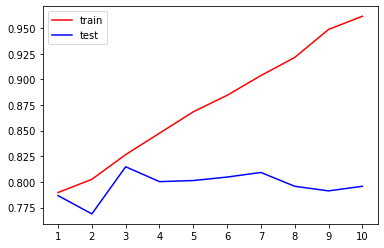

In [21]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=0,max_depth=i+1
#                                 ,criterion='entropy'
                                )
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y, cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)

print(max(te))
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [ ]:
# 网格搜索：同时调整多个参数，枚举

